# Support Vector Regression (SVR)

## Importing the libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [29]:
dataset = pd.read_csv('../Position_Salaries.csv')
X = dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1].values

In [30]:
print(X)
print(type(X))

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
<class 'numpy.ndarray'>


In [31]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

# because StandardScaler expects 2d array
y = y.reshape(len(y), 1)

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/Users/pawelztef/opt/anaconda3/envs/datas/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [34]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

# Visualising the SVR results

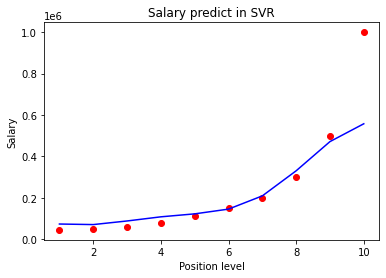

In [43]:
plt.scatter(
    sc_X.inverse_transform(X), 
    sc_y.inverse_transform(y),
    color = 'red',
)
plt.plot(
    sc_X.inverse_transform(X),
    sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)),
    color='blue',
)
plt.title('Salary predict in SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)